In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score


In [2]:
# data extraction

iris = load_iris()

x = iris.data
y = iris.target

labels = iris.target_names
feature_names = iris.feature_names

In [3]:
print(x.shape)
print(y.shape)

print(labels)
print(feature_names)

(150, 4)
(150,)
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [5]:
# Using grid search to find the best parameters

parameters = {
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [2, 5, 10, 20]
}

clf = DecisionTreeClassifier()

grid_model = GridSearchCV(estimator=clf, param_grid=parameters, cv=5, n_jobs=-1, verbose=2, scoring="accuracy")

grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [2, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy', verbose=2)

In [8]:
# The best model is found based on the given parameters and specified criteria

clf = grid_model.best_estimator_
print(grid_model.best_params_)


y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy * 100)

{'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2}
93.33333333333333


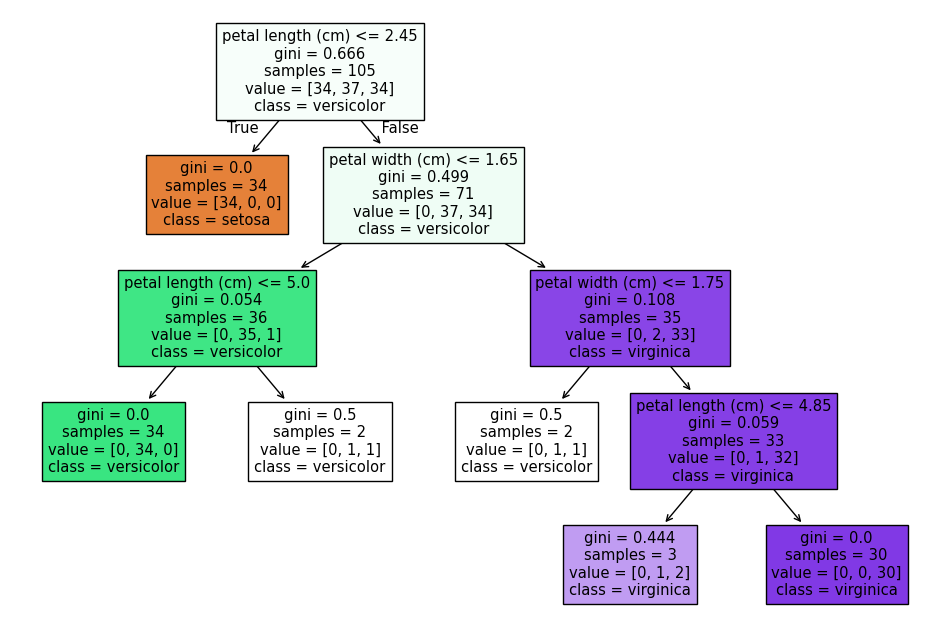

In [11]:
# Tree visualization and related information

plt.figure(figsize=(12, 8))

plot_tree(clf, feature_names=feature_names, class_names=labels, filled=True)
plt.show()

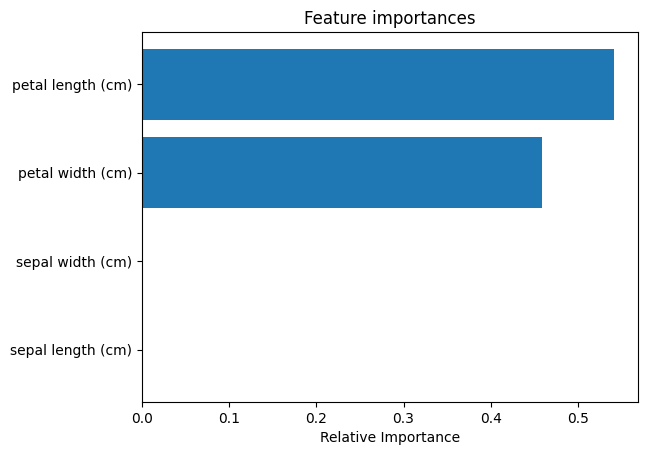

In [18]:
# Finding the importance of features

importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title("Feature importances")
plt.xlabel("Relative Importance")
plt.barh(range(len(importances)), importances[indices], align="center")
plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
plt.show()

In [21]:
# Finding correctly and incorrectly predicted samples

clf.fit(x, y)
y_pred = clf.predict(x)

correct_predict = np.where(y_pred == y)
wrong_predict = np.where(y_pred != y)

print(wrong_predict)

(array([ 70, 106, 129]),)


In [22]:
# Extracting data based on correct predictions

x_cleaned_without_wrongs = x[correct_predict]
y_cleaned_without_wrongs = y[correct_predict]
print(len(x_cleaned_without_wrongs))

147


In [23]:
# Model accuracy evaluation
print(accuracy_score(y, y_pred))

0.98


In [24]:
# Retraining the model based on correctly identified data
clf.fit(x_cleaned_without_wrongs, y_cleaned_without_wrongs)
y_pred = clf.predict(x_cleaned_without_wrongs)

print(accuracy_score(y_cleaned_without_wrongs, y_pred))

1.0


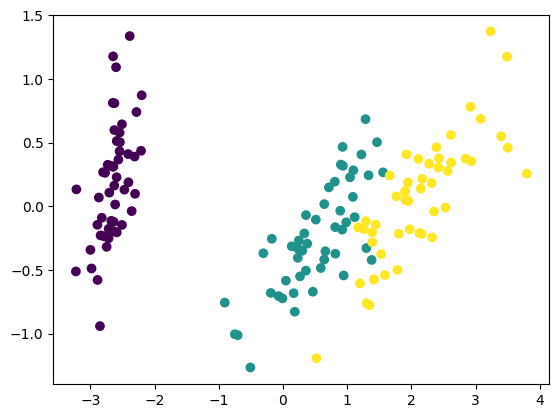

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_x = pca.fit_transform(x)

plt.scatter(pca_x[:, 0], pca_x[:, 1], c=y)
plt.show()

In [31]:
Q1 = np.quantile(x, 0.25)
Q3 = np.quantile(x, 0.75)

IQR = Q3 - Q1

upper_bound = Q3 + IQR * 1.5
lower_bound = Q1 - IQR * 1.5

out_liers = np.where((x < lower_bound) & (x > upper_bound))
print(out_liers)

(array([], dtype=int64), array([], dtype=int64))
